In [139]:
import numpy as np
import scipy.stats as stats
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enhancing default style of Matplotlib and Seaborn
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [140]:
# Import the dataset
data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv",encoding="latin-1")

# Initial exploration of data
initial_affichage = data.head()


In [141]:
initial_affichage

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [143]:
# Imputing missing values based on data distribution, data type, and relevance
# For numerical columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
# For categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Converting relevant columns to appropriate data types
# Example: data['column_name'] = pd.to_numeric(data['column_name'], errors='coerce')

In [144]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,-,Demonstration,Wright Flyer III,19,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,15:00,"Juvisy-sur-Orge, France",Aeroflot,-,Air show,Wright Byplane,SC1,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,-,Test flight,Dirigible,19,1,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,15:00,"Victoria, British Columbia, Canada",Private,-,Training,Curtiss seaplane,19,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,-,Training,Zeppelin L-1 (airship),19,1,20.0,12.0,4.0,14.0,8.0,3.0,0.0,The airship flew into a thunderstorm and encou...


In [145]:
detailed = data.describe(include='all')
detailed

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
count,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998
unique,4570,1060,4122,2264,880,3825,2463,4689,3818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4839
top,8/31/1988,15:00,"Moscow, Russia",Aeroflot,-,Training,Douglas DC-3,19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crashed under unknown circumstances.
freq,4,1550,21,265,3705,870,348,277,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.141257,26.321329,4.457583,22.355342,18.518607,3.550620,1.704682,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.461818,43.203147,3.405622,35.036614,33.393452,3.093069,55.306594,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,29.000000,5.000000,25.000000,20.000000,5.000000,0.000000,NaN


In [146]:
# Conversion automatique des dates (détecte les colonnes contenant "date")
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
print(data['Date'].isna().sum())

0


In [147]:
# Conversion 
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category')

print(data.dtypes)

Date                     datetime64[ns]
Time                           category
Location                       category
Operator                       category
Flight #                       category
Route                          category
AC Type                        category
Registration                   category
cn/ln                          category
Aboard                          float64
Aboard Passangers               float64
Aboard Crew                     float64
Fatalities                      float64
Fatalities Passangers           float64
Fatalities Crew                 float64
Ground                          float64
Summary                        category
dtype: object


In [148]:
#calculer les statistiques 
mean_values = data[['Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Aboard', 'Aboard Passangers', 'Aboard Crew']].mean()
median_values = data[['Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Aboard', 'Aboard Passangers', 'Aboard Crew']].median()
std_values = data[['Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Aboard', 'Aboard Passangers', 'Aboard Crew']].std()

print("\nMoyenne :\n", mean_values)
print("\nMédiane :\n", median_values)
print("\nÉcart-type :\n", std_values)


Moyenne :
 Fatalities               22.355342
Fatalities Passangers    18.518607
Fatalities Crew           3.550620
Aboard                   31.141257
Aboard Passangers        26.321329
Aboard Crew               4.457583
dtype: float64

Médiane :
 Fatalities               11.0
Fatalities Passangers     8.0
Fatalities Crew           3.0
Aboard                   16.0
Aboard Passangers        12.0
Aboard Crew               4.0
dtype: float64

Écart-type :
 Fatalities               35.036614
Fatalities Passangers    33.393452
Fatalities Crew           3.093069
Aboard                   45.461818
Aboard Passangers        43.203147
Aboard Crew               3.405622
dtype: float64


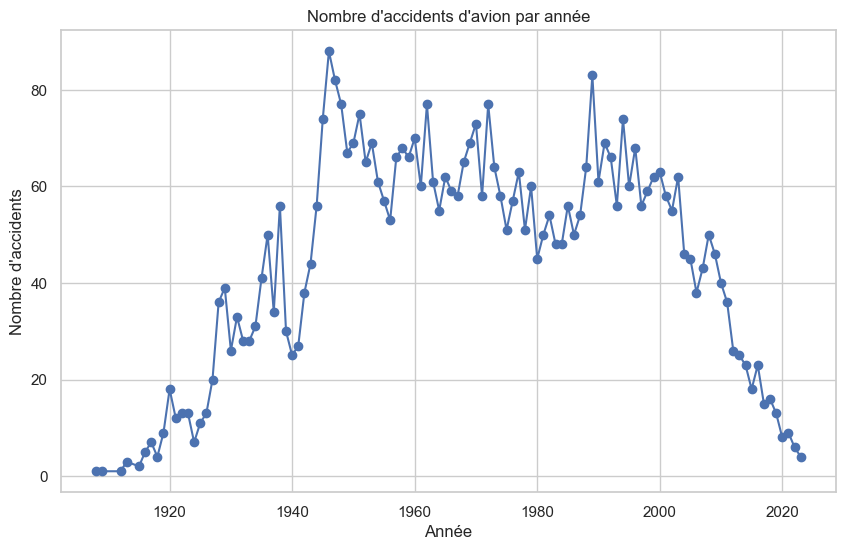

In [ ]:
import matplotlib.pyplot as plt

#Analysez la fréquence des accidents au fil du temps pour identifier les tendances
#Extraire l'année 
data['Year'] = data['Date'].dt.year

#Regrouper par année
accidents_by_year = data.groupby('Year').size().sort_values(ascending=False)

# Tracer le nombre d'accidents par année
plt.figure(figsize=(10, 6))
accidents_by_year.sort_index().plot(kind='line', marker='o', color='b')
plt.title("Nombre d'accidents d'avion par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'accidents")
plt.grid(True)
plt.show()

Statistiques descriptives des taux de mortalité :
count    4993.000000
mean        0.817701
std         0.312212
min         0.000000
25%         0.750000
50%         1.000000
75%         1.000000
max         1.625000
Name: Mortality Rate, dtype: float64

 Statistiques descriptives des taux de survie :
count    4993.000000
mean        0.182299
std         0.312212
min        -0.625000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.000000
Name: Survival Rate, dtype: float64


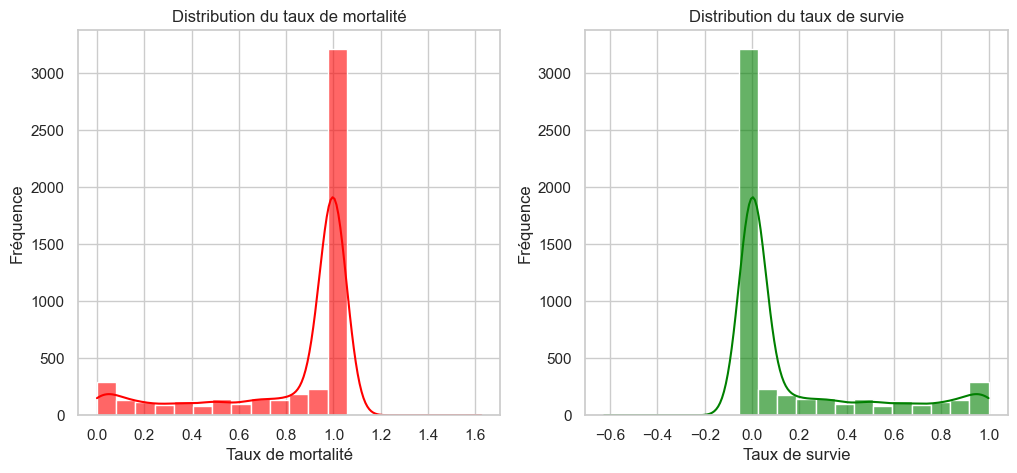

In [164]:

# Calcul des taux
data['Mortality Rate'] = data['Fatalities'] / data['Aboard']
data['Survival Rate'] = 1 - data['Mortality Rate']
print("Statistiques descriptives des taux de mortalité :")
print(data['Mortality Rate'].describe())

print("\n Statistiques descriptives des taux de survie :")
print(data['Survival Rate'].describe())

# Histogramme
plt.figure(figsize=(12, 5))

# Histogramme
plt.subplot(1, 2, 1)
sns.histplot(data['Mortality Rate'], bins=20, kde=True, color='red', alpha=0.6)
plt.title("Distribution du taux de mortalité")
plt.xlabel("Taux de mortalité")
plt.ylabel("Fréquence")
plt.grid(True)

# Histogramme
plt.subplot(1, 2, 2)
sns.histplot(data['Survival Rate'], bins=20, kde=True, color='green', alpha=0.6)
plt.title("Distribution du taux de survie")
plt.xlabel("Taux de survie")
plt.ylabel("Fréquence")
plt.grid(True)

plt.show()

In [ ]:
# Calcul des statistiques pour les taux
rate_stats = data[['Mortality Rate', 'Survival Rate']].agg(['mean', 'median', 'std'])

# Affichage
print("\nStatistiques des taux de mortalité et de survie :")
print(rate_stats)
# Mortalité




📊 Statistiques des taux de mortalité et de survie :
        Mortality Rate  Survival Rate
mean          0.817701       0.182299
median        1.000000       0.000000
std           0.312212       0.312212


In [ ]:
# T-test Example
data['Decade'] = (data['Date'].dt.year // 10) * 10  # Convertir l'année en décennie
#// 10 divise l'année par 10 et garde uniquement la partie entière (division entière).
#* 10 multiplier par 10 pour la décennie complète.

decade1 = 1980
decade2 = 2020
#un tableau contenant le nombre de décès pour les accidents dans la décennie
group1 = data[data['Decade'] == decade1]['Fatalities'].dropna()
group2 = data[data['Decade'] == decade2]['Fatalities'].dropna()

t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Welch's t-test si variances inégales

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une différence significative entre les deux groupes.")
else:
    print("Aucune différence significative entre les deux groupes.")

T-statistic: -0.030311776166023627
P-value: 0.9760228397420454
🟩 Aucune différence significative entre les deux groupes.
